### CS 216 Project
##### Delaney Demark (dad48)

In [ ]:
# Imports (update throughout as necessary)
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt # just to format confusion matrix

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

import re

#### Data loading and cleaning

Notes:
* No null values found
* No duplicate values found

In [ ]:
# Data loading
data10 = pd.read_csv('./datasets/dataset-of-10s.csv')
data00 = pd.read_csv('./datasets/dataset-of-00s.csv')
data90 = pd.read_csv('./datasets/dataset-of-90s.csv')
data80 = pd.read_csv('./datasets/dataset-of-80s.csv')
data70 = pd.read_csv('./datasets/dataset-of-70s.csv')
data60 = pd.read_csv('./datasets/dataset-of-60s.csv')

In [ ]:
# Data cleaning

# Drop all na values
data10 = data10.dropna()
data00 = data00.dropna()
data90 = data90.dropna()
data80 = data80.dropna()
data70 = data70.dropna()
data60 = data60.dropna()


# Add a decades column to each dataset (will be helpful when creating cumulative dataset)
data10['decade'] = [2010]*len(data10)
data00['decade'] = [2000]*len(data00)
data90['decade'] = [1990]*len(data90)
data80['decade'] = [1980]*len(data80)
data70['decade'] = [1970]*len(data70)
data60['decade'] = [1960]*len(data60)

In [ ]:
# Check for duplicates in dataset
merged = data10.merge(data00,on=['track','artist'])
merged = merged.merge(data90,on=['track','artist'])
merged = merged.merge(data80,on=['track','artist'])
merged = merged.merge(data70,on=['track','artist'])
merged = merged.merge(data60,on=['track','artist'])
merged
# NOTE: No duplicates found

,uri_x,danceability_x,energy_x,key_x,loudness_x,mode_x,speechiness_x,acousticness_x,instrumentalness_x,liveness_x,...,instrumentalness_y,liveness_y,valence_y,tempo_y,duration_ms_y,time_signature_y,chorus_hit_y,sections_y,target_y,decade_y


In [ ]:
# Create cumulative dataset (from songs across all decades)
data = data10.append(data00,ignore_index=True).append(data90,ignore_index=True).append(data80,ignore_index=True).append(data70,ignore_index=True).append(data60,ignore_index=True)
data.head()
data.tail()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
41101,Le ire di Ursus,Giampiero Boneschi,spotify:track:3dVgolCVuNgecU5jovpc45,0.420,0.8730,3,-11.689,1,0.1000,0.808,0.879000,0.363,0.183,119.821,26244,4,0.00000,2,0,1960
41102,A-B-C,John Zacherle,spotify:track:0zXhzKf4raEYstebL7L42C,0.716,0.7420,10,-5.727,0,0.2420,0.663,0.000000,0.107,0.834,135.104,142987,4,28.34316,10,0,1960
41103,Useless Landscape,Antônio Carlos Jobim,spotify:track:2uC02PCRVM6BhAaK7dgxxp,0.361,0.0944,10,-22.663,1,0.0327,0.940,0.000178,0.115,0.139,92.472,137200,4,56.63498,6,0,1960
41104,Vendedor De Assaí,Ary Lobo,spotify:track:0gpSUWZWNIRrEenaC1ZGk9,0.452,0.7590,4,-7.821,0,0.1750,0.658,0.000000,0.738,0.853,137.976,159107,3,28.24372,9,0,1960
41105,Mambo Simphony - Remasterizado,Orquesta Casino De La Playa,spotify:track:5j0G0nkCSPlmSCSgXchMn3,0.554,0.2780,5,-8.386,1,0.0349,0.928,0.922000,0.136,0.428,131.401,164227,4,37.39251,8,0,1960


In [ ]:
# Add custom columns that will be useful later

# Duration of song in seconds
data["duration_sec"] = np.round(data["duration_ms"]*(1/1000))
data["duration_sec"]

# Loudness of sound (rounded)
data["loudness_rounded"] = np.round(data["loudness"])
data["loudness_rounded"]

0        -5.0
1       -15.0
2        -7.0
3        -6.0
4        -4.0
         ... 
41101   -12.0
41102    -6.0
41103   -23.0
41104    -8.0
41105    -8.0
Name: loudness_rounded, Length: 41106, dtype: float64

In [ ]:
# Regression for each component
targetData = data['target'].to_numpy()

# loudness 
loud_data = data[['loudness']].values
lr_loud = LogisticRegression()
lr_loud.fit(X = loud_data, y = targetData)
loud_predict = lr_loud.predict(loud_data)
loud_mse = mean_squared_error(targetData, loud_predict)
loud_r2 = r2_score(targetData, loud_predict)
print("Loudness MSE:", loud_mse, "Loudness r^2:", loud_r2)

# energy 
energy_data = data[['energy']].values
lr_energy = LogisticRegression()
lr_energy.fit(X = energy_data, y = targetData)
energy_predict = lr_energy.predict(energy_data)
energy_mse = mean_squared_error(targetData, energy_predict)
energy_r2 = r2_score(targetData, energy_predict)
print("energy MSE:", energy_mse, "energy r^2:", energy_r2)

# speechiness 
speechiness_data = data[['speechiness']].values
lr_speechiness = LogisticRegression()
lr_speechiness.fit(X = speechiness_data, y = targetData)
speechiness_predict = lr_speechiness.predict(speechiness_data)
speechiness_mse = mean_squared_error(targetData, speechiness_predict)
speechiness_r2 = r2_score(targetData, speechiness_predict)
print("speechiness MSE:", speechiness_mse, "speechiness r^2:", speechiness_r2)

# danceability
danceability_data = data[['danceability']].values
lr_danceability = LogisticRegression()
lr_danceability.fit(X = danceability_data, y = targetData)
danceability_predict = lr_danceability.predict(danceability_data)
danceability_mse = mean_squared_error(targetData, danceability_predict)
danceability_r2 = r2_score(targetData, danceability_predict)
print("danceability MSE:", danceability_mse, "danceability r^2:", danceability_r2)

# valence 
valence_data = data[['valence']].values
lr_valence = LogisticRegression()
lr_valence.fit(X = valence_data, y = targetData)
valence_predict = lr_valence.predict(valence_data)
valence_mse = mean_squared_error(targetData, valence_predict)
valence_r2 = r2_score(targetData, valence_predict)
print("valence MSE:", valence_mse, "valence r^2:", valence_r2)

# tempo
tempo_data = data[['tempo']].values
lr_tempo = LogisticRegression()
lr_tempo.fit(X = tempo_data, y = targetData)
tempo_predict = lr_tempo.predict(tempo_data)
tempo_mse = mean_squared_error(targetData, tempo_predict)
tempo_r2 = r2_score(targetData, tempo_predict)
print("tempo MSE:", tempo_mse, "tempo r^2:", tempo_r2)

# instrumental
instrumentalness_data = data[['instrumentalness']].values
lr_instrumentalness = LogisticRegression()
lr_instrumentalness.fit(X = instrumentalness_data, y = targetData)
instrumentalness_predict = lr_instrumentalness.predict(instrumentalness_data)
instrumentalness_mse = mean_squared_error(targetData, instrumentalness_predict)
instrumentalness_r2 = r2_score(targetData, instrumentalness_predict)
print("instrumentalness MSE:", instrumentalness_mse, "instrumentalness r^2:", instrumentalness_r2)

# duration
duration_data = data[['duration_ms']].values
lr_duration = LogisticRegression()
lr_duration.fit(X = duration_data, y = targetData)
duration_predict = lr_duration.predict(duration_data)
duration_mse = mean_squared_error(targetData, duration_predict)
duration_r2 = r2_score(targetData, duration_predict)
print("duration MSE:", duration_mse, "duration r^2:", duration_r2)

# All of these logistic regressions resulted in an exceptionally low r^2 value, 
# meaning that the model did a particularly poor job in predicting these values

Loudness MSE: 0.3973142606918698 Loudness r^2: -0.5892570427674793
energy MSE: 0.42645842456089134 energy r^2: -0.7058336982435653
speechiness MSE: 0.4773512382620542 speechiness r^2: -0.9094049530482169
danceability MSE: 0.3545224541429475 danceability r^2: -0.4180898165717899
valence MSE: 0.4014985646864205 valence r^2: -0.6059942587456819
tempo MSE: 0.48513598987982287 tempo r^2: -0.9405439595192915
instrumentalness MSE: 0.32885710115311634 instrumentalness r^2: -0.31542840461246535
duration MSE: 0.5 duration r^2: -1.0


Text(0.5, 1.0, 'Proportion of hits to flops based on duration over time')

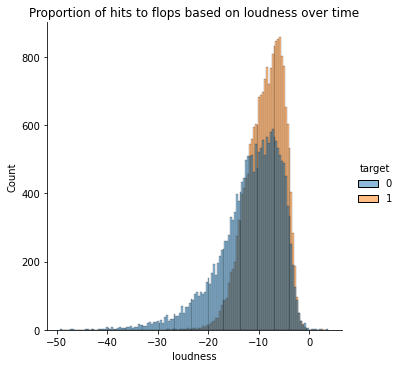

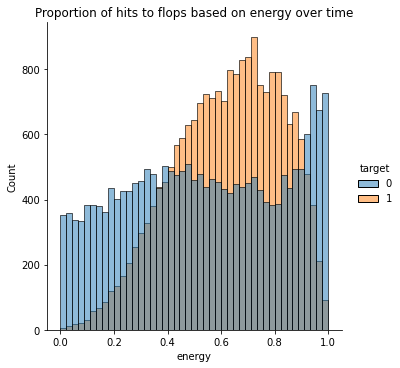

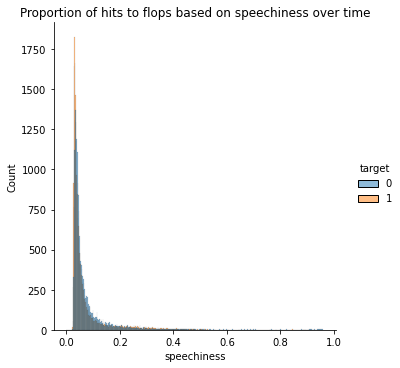

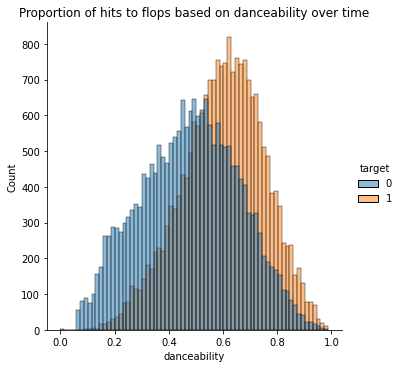

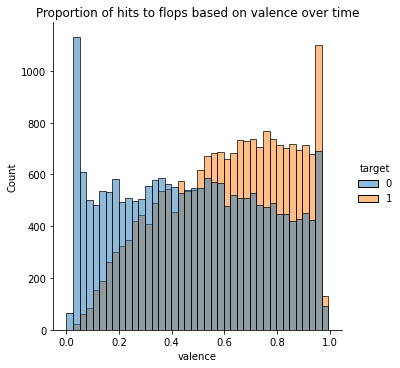

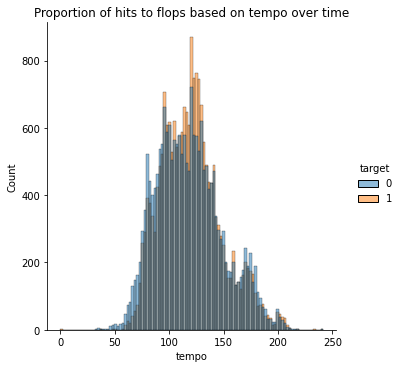

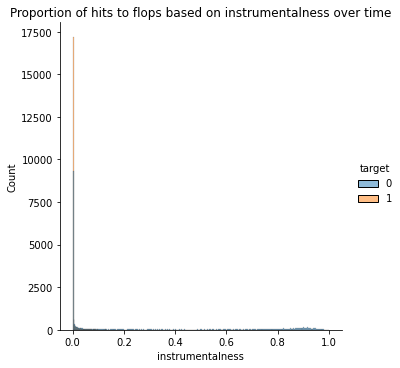

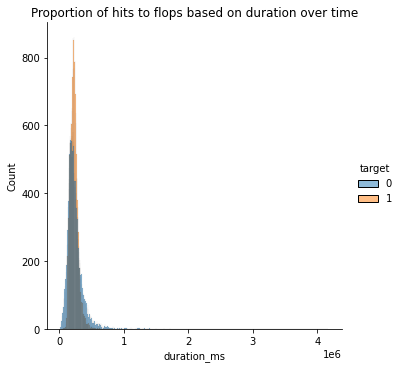

In [ ]:
# Bar plot for each decade which shows the proportion of hits vs flops predicted by each component

# Number of bins needs to be adjusted
# Loudness
sns.displot(data, x="loudness", hue="target")
plt.title("Proportion of hits to flops based on loudness over time")

# energy
sns.displot(data, x="energy", hue="target")
plt.title("Proportion of hits to flops based on energy over time")

# speechiness
sns.displot(data, x="speechiness", hue="target")
plt.title("Proportion of hits to flops based on speechiness over time")

# danceability
sns.displot(data, x="danceability", hue="target")
plt.title("Proportion of hits to flops based on danceability over time")

# valence 
sns.displot(data, x="valence", hue="target")
plt.title("Proportion of hits to flops based on valence over time")

# tempo
sns.displot(data, x="tempo", hue="target")
plt.title("Proportion of hits to flops based on tempo over time")

# instrumentalness
sns.displot(data, x="instrumentalness", hue="target", )
plt.title("Proportion of hits to flops based on instrumentalness over time")

# duration 
sns.displot(data, x="duration_ms", hue="target")
plt.title("Proportion of hits to flops based on duration over time")

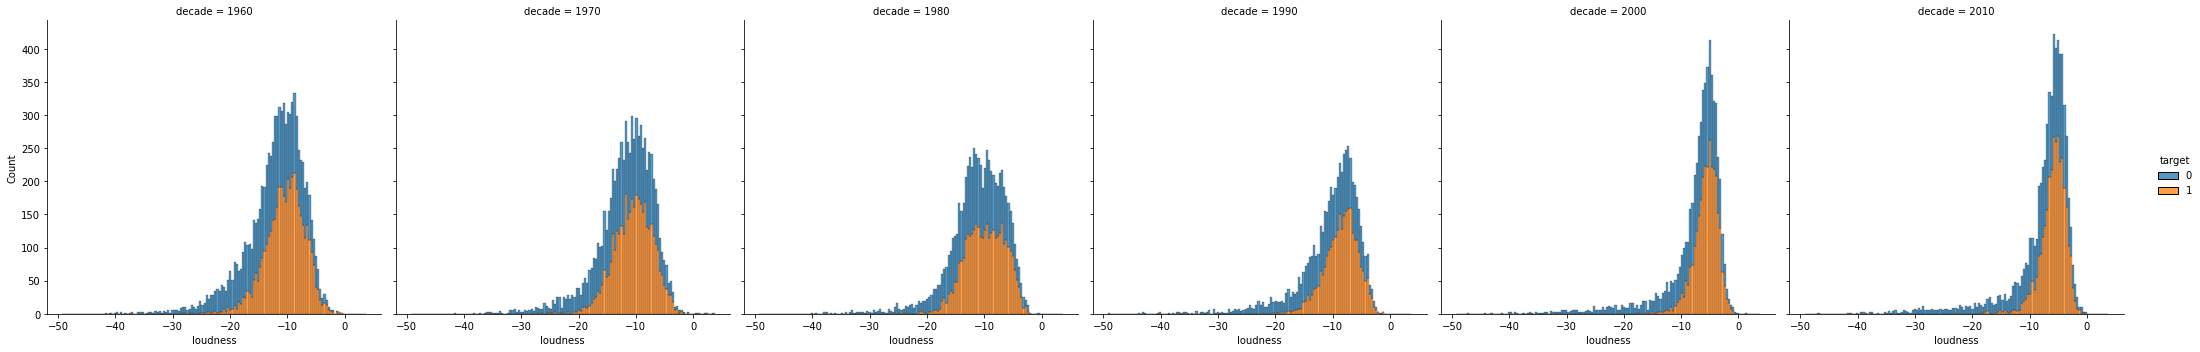

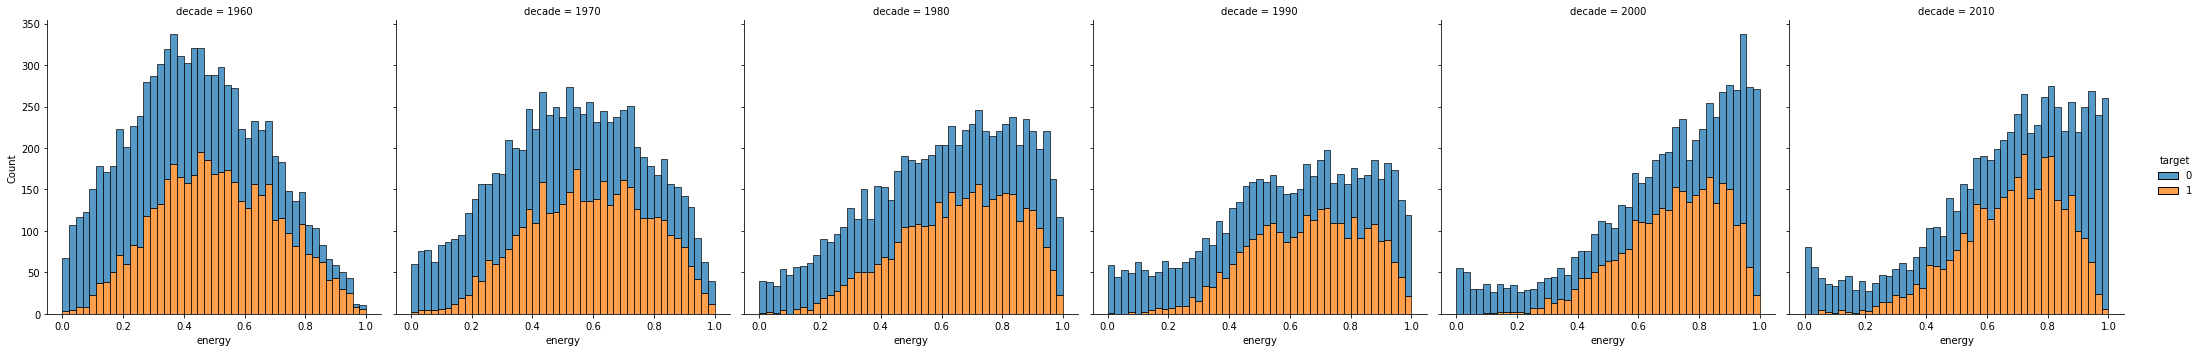

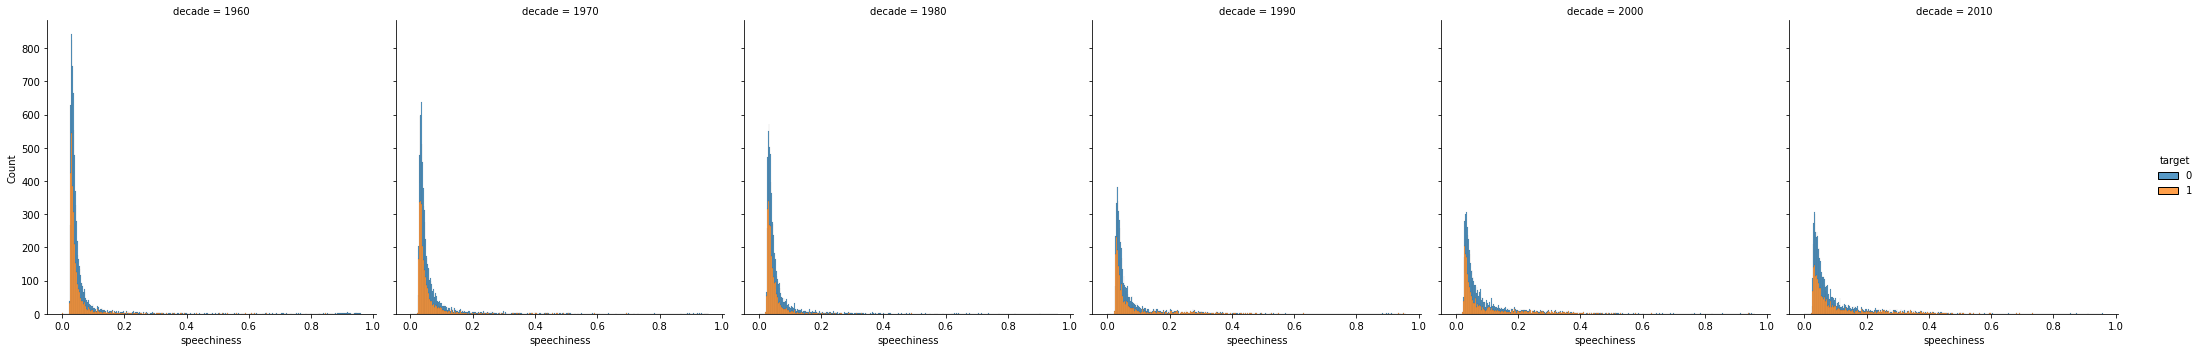

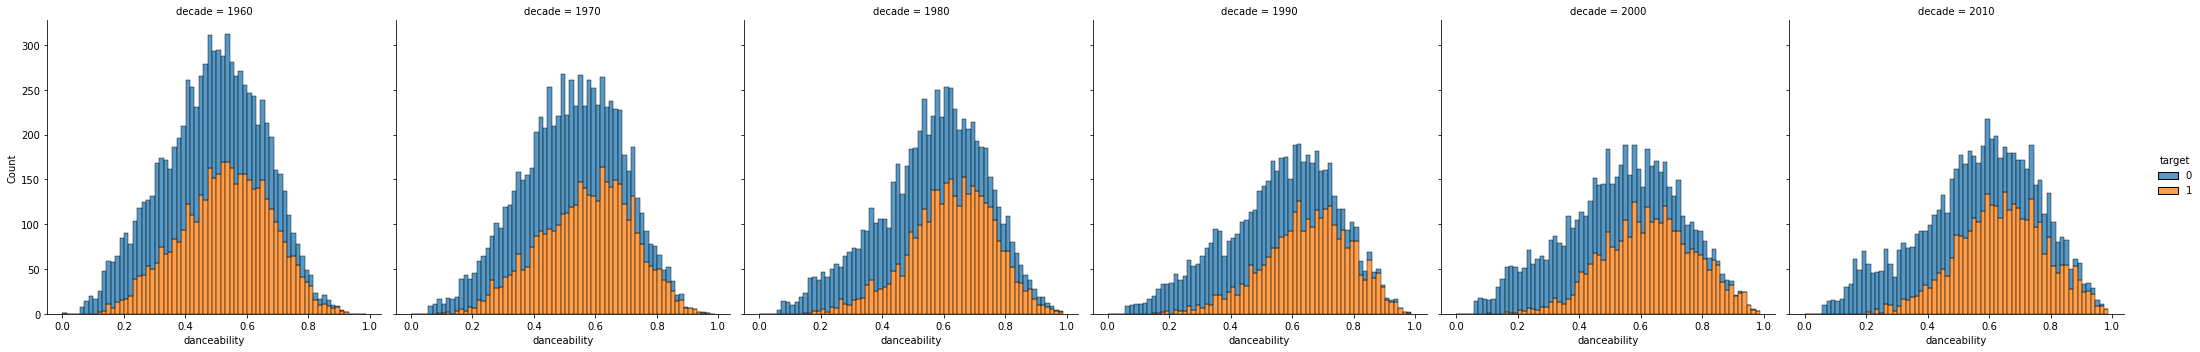

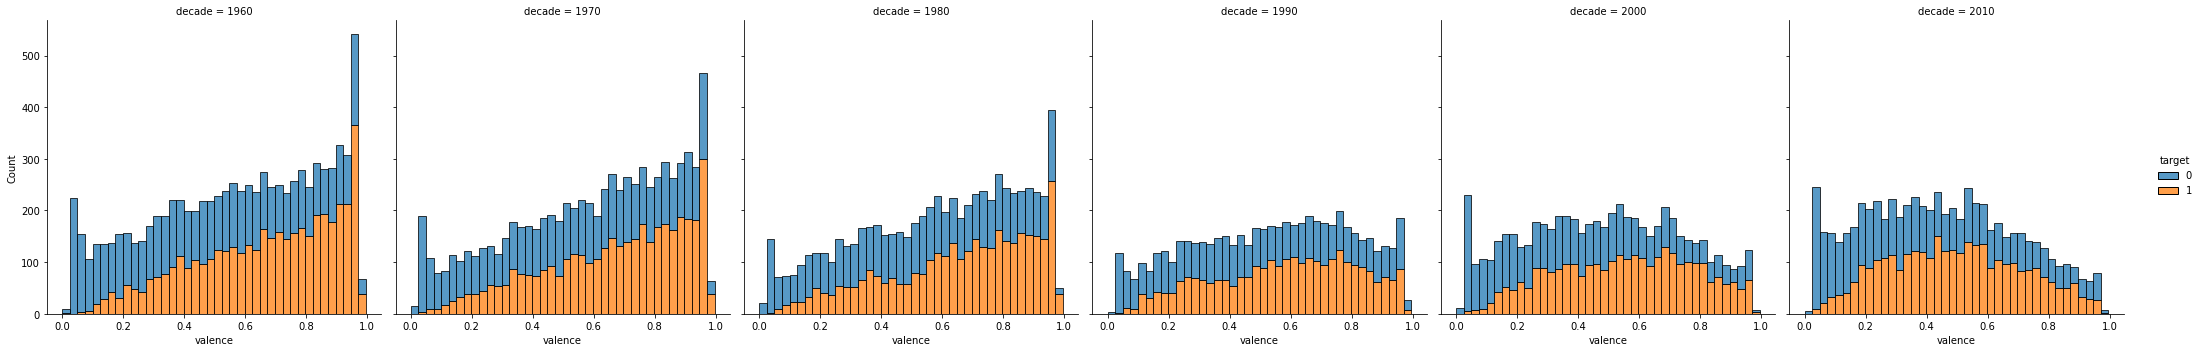

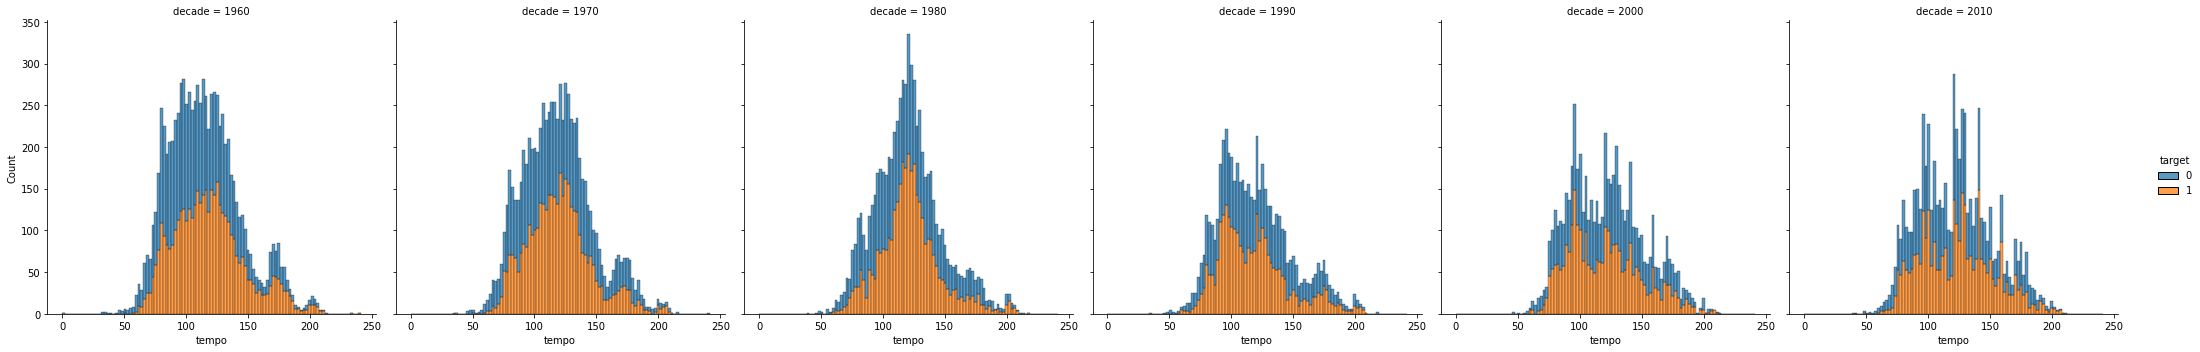

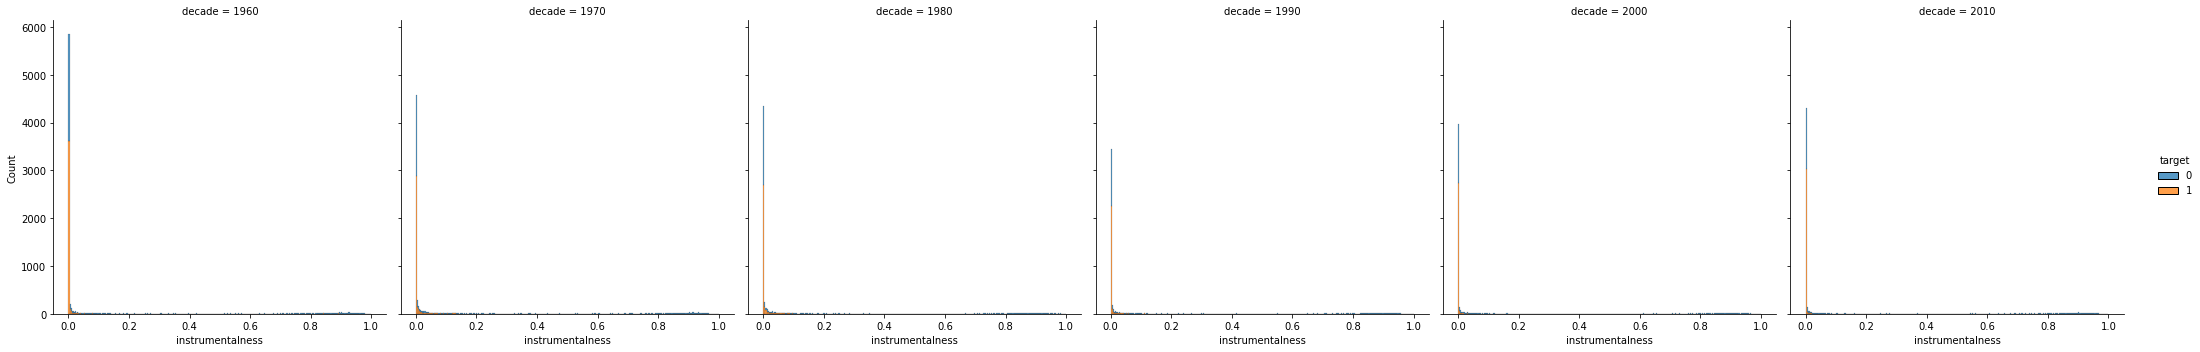

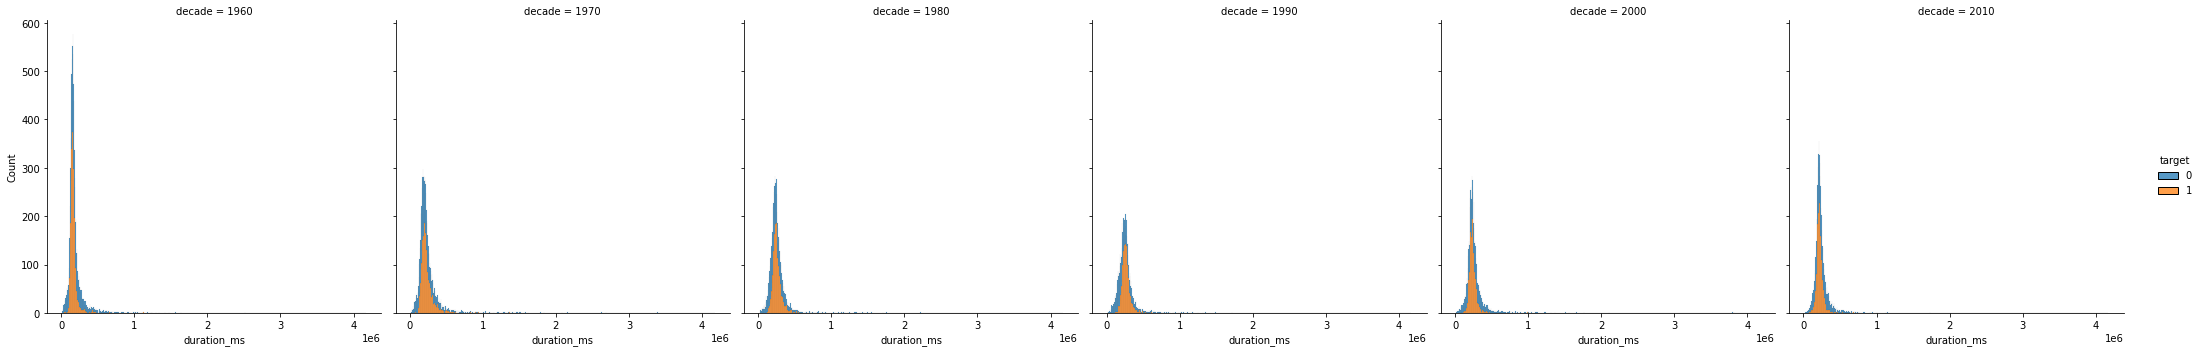

In [ ]:
# Bar plot for each decade which shows the proportion of hits vs flops predicted by each component

# Number of bins needs to be adjusted
# Loudness
sns.displot(data, x="loudness", hue="target", col="decade", multiple='stack')

# energy
sns.displot(data, x="energy", hue="target", col="decade", multiple='stack')

# speechiness
sns.displot(data, x="speechiness", hue="target", col="decade", multiple='stack')

# danceability
sns.displot(data, x="danceability", hue="target", col="decade", multiple='stack')

# valence 
sns.displot(data, x="valence", hue="target", col="decade",  multiple='stack')

# tempo
sns.displot(data, x="tempo", hue="target", col="decade",  multiple='stack')

# instrumentalness
sns.displot(data, x="instrumentalness", hue="target", col="decade",  multiple='stack')

# duration 
sns.displot(data, x="duration_ms", hue="target", col="decade",  multiple='stack')

In [ ]:
data.columns

Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target', 'decade', 'duration_sec', 'loudness_rounded'],
      dtype='object')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=162d76af-48a2-4f75-9aef-34643a48aa39' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>